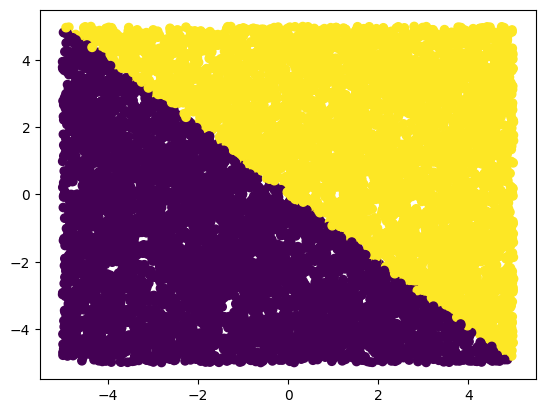

In [12]:
# create random point with two coordinates between -5 and 5 on both axis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def create_points(n):
    data = np.random.uniform(-5, 5, (n, 2))
    y = np.zeros(n)
    # select the one above the line y = -x
    filter = data[:, 1] > -data[:, 0]
    y[filter] = 1
    return data, y

data, y = create_points(10000)
# visualise them
plt.scatter(data[:, 0], data[:, 1], c=y)

In [13]:
# how to select the points between two lines y = 2x and y = 2x + 1
# y = 2x
# y = 2x + 1
def select_points(data, m, n):
    # check if m and n are both positive or both negative
    if (m > 0 and n < 0) or (m < 0 and n > 0):
        a = data[(data[:,1] > m*data[:,0]) & (data[:,1] > n*data[:,0])]
        b = data[(data[:,1] < n*data[:,0]) & (data[:,1] < m*data[:,0])]
    else:
        a = data[(data[:,1] > m*data[:,0]) & (data[:,1] < n*data[:,0])]
        b = data[(data[:,1] > n*data[:,0]) & (data[:,1] < m*data[:,0])]
    return np.concatenate((a, b))
exp = select_points(data, 2, 3)

In [14]:
# divide the space in n slices
def divide_space(data, n):
    client_dict = {}
    angle = 180/n
    angles = np.arange(0, 179, angle)
    # apply the same function to each element of the list
    m = np.tan(np.radians(angles))
    # select a random element in m
    y_div = np.random.choice(m, 1, replace=False)
    for i in range(n-1):
        print(i, m[i], m[i+1])
        client_dict[i] = {}
        client_dict[i]['x'] = select_points(data, m[i], m[i+1])
        client_dict[i]['y'] = np.zeros(len(client_dict[i]['x']))
        filter = client_dict[i]['x'][:, 1] > y_div*client_dict[i]['x'][:, 0]
        client_dict[i]['y'][filter] = 1
    client_dict[n-1] = {}
    client_dict[n-1]['x'] = select_points(data,  m[n-1], m[0])
    client_dict[n-1]['y'] = np.zeros(len(client_dict[n-1]['x']))
    filter = client_dict[n-1]['x'][:, 1] > y_div*client_dict[n-1]['x'][:, 0]
    client_dict[n-1]['y'][filter] = 1
    return client_dict
data_dict = divide_space(data, 7)

0 0.0 0.4815746188075286
1 0.4815746188075286 1.2539603376627035
2 1.2539603376627035 4.381286267534822
3 4.381286267534822 -4.381286267534825
4 -4.381286267534825 -1.2539603376627029
5 -1.2539603376627029 -0.48157461880752883


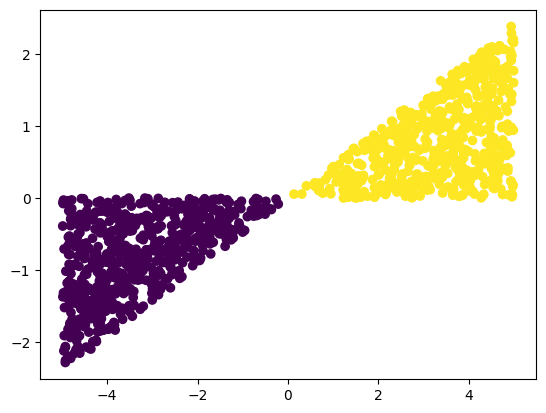

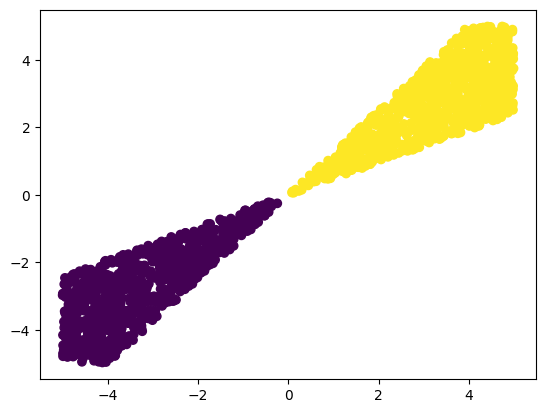

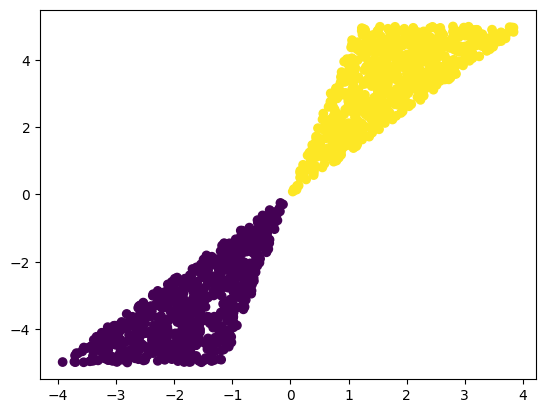

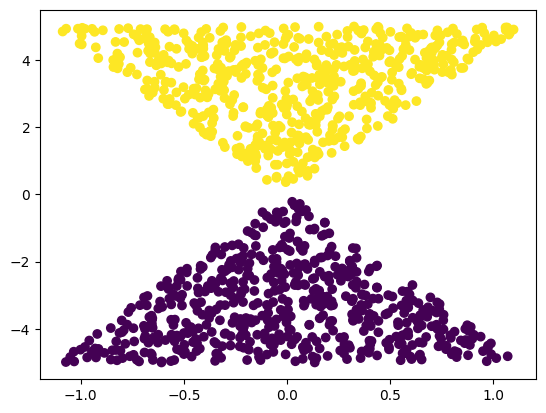

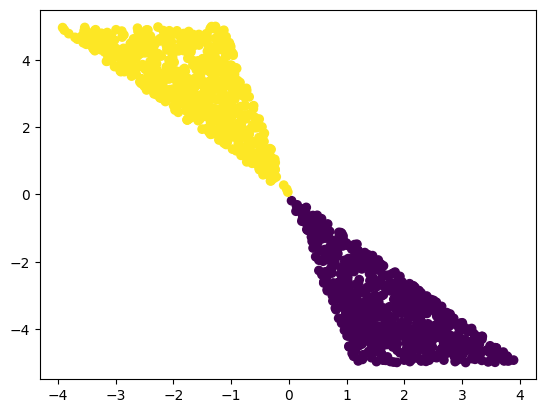

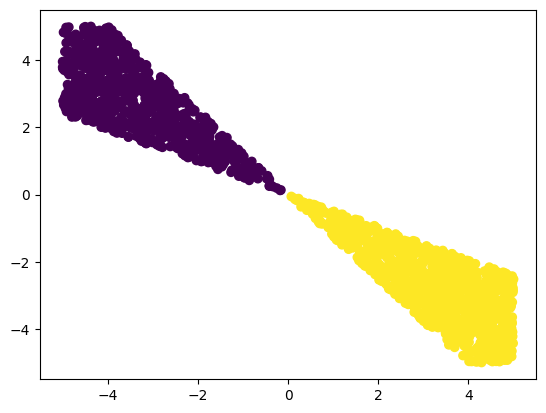

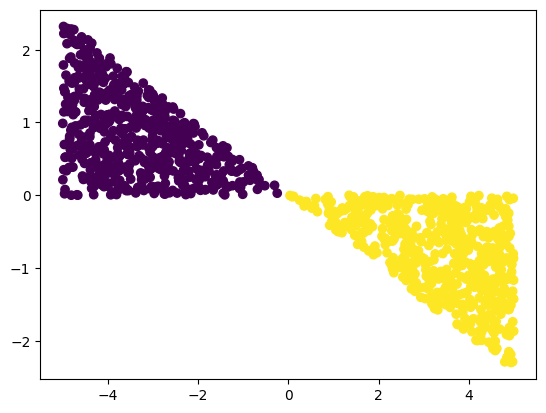

In [15]:
# visualise data dict with different colors
for key in data_dict:
    plt.scatter(data_dict[key]['x'][:, 0], data_dict[key]['x'][:, 1], c=data_dict[key]['y'])
    plt.show()

In [17]:
# combine x and y in a single dataframe
# and then save n npy file that contains the x and y for each client in the same file
for key in data_dict:
    df = np.concatenate((data_dict[key]['x'], data_dict[key]['y'].reshape(-1, 1)), axis=1)
    # convert to pandas dataframe
    df = pd.DataFrame(df, columns=['x1', 'x2', 'Labels'])
     # save as csv
    if key == 0:
        df.to_csv('df_synthetic_random_test.csv'.format(key+1), index=False)
    else:
        df.to_csv('df_synthetic_random_{}.csv'.format(key+1), index=False)
